In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [12]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [13]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [129]:
mv = df.groupby(pd.Grouper(key='Day', freq='Y'))['t'].mean()
mv.idxmin().year, mv.idxmax().year

(2012, 2015)

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [130]:
jan_pos_temp = df[(df.Day.dt.month==1) & (df.t>=0)]
year_count = jan_pos_temp.groupby(pd.Grouper(key='Day', freq='Y'))['t'].count()
year_count.idxmax().year

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [133]:
summ = df[(df.Day.dt.month <= 8) & (df.Day.dt.month >= 6)]
year_mean = summ.groupby(pd.Grouper(key='Day', freq='Y'))['t'].mean()
year_mean.idxmin().year

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [161]:
id_max_diff = df.t.diff().abs().idxmax()
print(df.iloc[id_max_diff].Day)

2014-05-27 00:00:00


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

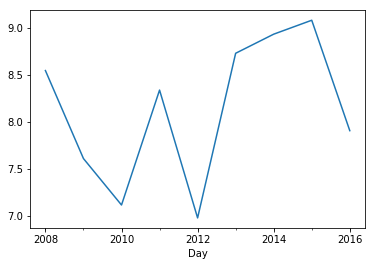

In [164]:
df.groupby(pd.Grouper(key='Day', freq='Y'))['t'].mean().plot()